In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df1 = pd.read_csv('project1_F20_1_train.csv')
df1 = df1.drop(columns = ['Unnamed: 0'])
df1

,X1,Y
0,0.216929,0.042948
1,0.951079,0.771405
2,0.292179,-0.162380
3,0.209745,-0.132092
4,-0.110923,0.336471
...,...,...
145,0.182378,-0.064047
146,0.819809,0.548160
147,-0.070341,0.342066
148,-0.648124,0.799403


In [1016]:
a = min(df1['X1'])
A = max(df1['X1'])
u = np.linspace(a, A, num=1000)

# 1. Gaussian Kernel

In [5]:
#Gauss Kernel is calculated here
def a_program(X,Y,x,h,d):
    fh_u = 0 
    kernel_1=0
    kernel_2=0
    for i in range(len(X)):
        kernel_1 += Y.iloc[i]* ((np.exp((-(abs((x-X.iloc[i])/h))**2)/2))/(np.sqrt(2*np.pi))**(d/2))/h**d
        kernel_2 += ((np.exp((-(abs((x-X.iloc[i])/h))**2)/2))/(np.sqrt(2*np.pi))**(d/2))/h**d
    fh_u += kernel_1/kernel_2
    return fh_u

# 2. Epanechnikov Kernel

In [1198]:
#Epi Kernel is calculated here
def second_program(X,Y,x,h):
    fh_u2 = 0
    res_k1 = np.zeros(len(x))
    res_k2 = np.zeros(len(x))
    res = np.zeros(len(x))
    for i in range(len(X)):
        for xx in range(len(x)):
            term = (x.iloc[xx]-X.iloc[i])/h
            if abs(term) <= 1:
                product = (1-(abs(term))**2)/h 
                res_k1[xx] += Y.iloc[i]*((3/4)**1)* product
                res_k2[xx] += ((3/4)**1)* product
    fh_u2 = res_k1/res_k2
    for i in range(len(res_k2)):
        if res_k2[i] == 0:
            fh_u2[i] = 0
    return fh_u2

# 3. Mat`ern of order 2 Kernel

In [1021]:
#Matern Kernel is calculated here
def matern_program(X,Y,x,h,d):
    fh_u3 = 0
    kernel_1=0
    kernel_2=0
    for i in range(len(X)):
        term_1 = abs((x-X.iloc[i])/h)
        term_2 = (((x-X.iloc[i])/h)**2)/3
        kernel_1 += Y.iloc[i] * (3/16)* (1+term_1+term_2)*np.exp(-term_1)/h**d
        kernel_2 += (3/16)* (1+term_1+term_2)*np.exp(-term_1)/h**d
    fh_u3 += kernel_1/kernel_2
    return fh_u3

# 4. Test the Gaussian Kernel Algorithm

In [6]:
fh_u_1 = a_program(df1['X1'],df1['Y'],u,0.01,1)
fh_u_2 = a_program(df1['X1'],df1['Y'],u,0.1,1)
fh_u_3 = a_program(df1['X1'],df1['Y'],u,0.2,1)

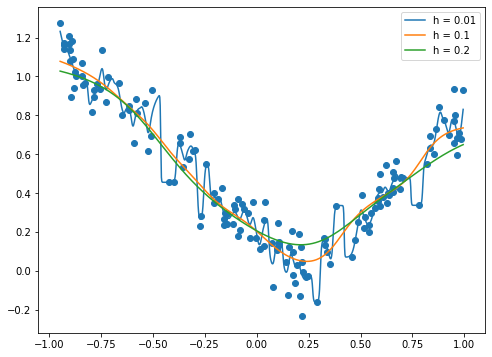

In [7]:
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(df1['X1'],df1['Y'])
ax.plot(u,fh_u_1,label='h = 0.01')
ax.plot(u,fh_u_2,label='h = 0.1')
ax.plot(u,fh_u_3,label='h = 0.2')
ax.legend()

In [783]:
fh_0_1 = a_program(df1['X1'],df1['Y'],0,0.01,1)
fh_0_2 = a_program(df1['X1'],df1['Y'],0,0.1,1)
fh_0_3 = a_program(df1['X1'],df1['Y'],0,0.2,1)
print(fh_0_1,fh_0_2,fh_0_3)

0.1889762797961984 0.20370662616236895 0.20554707637029615


In [1049]:
from sklearn.model_selection import KFold
for hhh in [0.01,0.1,0.2]:
    MSE = []
    kf = KFold(5)
    for train_index, test_index in kf.split(df1['X1']):
        X_train, X_test = df1['X1'][train_index], df1['X1'][test_index]
        y_train, y_test = df1['Y'][train_index], df1['Y'][test_index]
        y_hat = a_program(X_train,y_train,X_test,hhh,1)
        MSE.append(sum((y_test-y_hat)**2)/len(y_test))
    print(hhh,np.mean(MSE))

0.01 0.014785519167930273
0.1 0.011879669774022146
0.2 0.015353248767304501


# 5 Test the Epanechnikov Kernel Algorithm

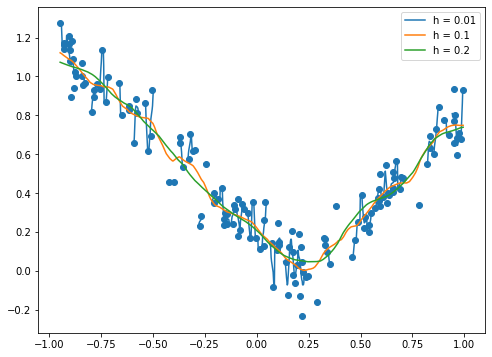

In [1173]:
fh_u_1 = second_program(df1['X1'],df1['Y'],u,0.01)
fh_u_2 = second_program(df1['X1'],df1['Y'],u,0.1)
fh_u_3 = second_program(df1['X1'],df1['Y'],u,0.2)
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(df1['X1'],df1['Y'])
ax.plot(u,fh_u_1,label='h = 0.01')
ax.plot(u,fh_u_2,label='h = 0.1')
ax.plot(u,fh_u_3,label='h = 0.2')
ax.legend()

In [1174]:
fh_0_1 = second_program_zero(df1['X1'],df1['Y'],0,0.01)
fh_0_2 = second_program_zero(df1['X1'],df1['Y'],0,0.1)
fh_0_3 = second_program_zero(df1['X1'],df1['Y'],0,0.2)
print(fh_0_1,fh_0_2,fh_0_3)

0.1658889330258489 0.22189113120690096 0.2070660451938902


In [1201]:
for hhh in [0.01,0.1,0.2]:
    MSE = []
    kf = KFold(5)
    for train_index, test_index in kf.split(df1['X1']):
        X_train, X_test = df1['X1'][train_index], df1['X1'][test_index]
        y_train, y_test = df1['Y'][train_index], df1['Y'][test_index]
        y_hat = second_program(X_train,y_train,X_test,hhh)
        MSE.append(sum((y_test-y_hat)**2)/len(y_test))
    print(hhh,np.mean(MSE))

0.01 0.14711104834408148
0.1 0.011591306213093068
0.2 0.01213732392255458


# 6 Test the Mat`ern of order 2 Kernel Algorithm

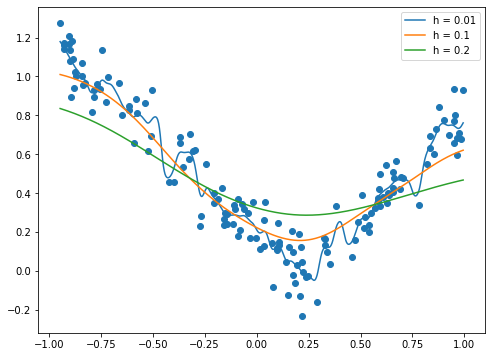

In [1022]:
fh_u_1 = matern_program(df1['X1'],df1['Y'],u,0.01,1)
fh_u_2 = matern_program(df1['X1'],df1['Y'],u,0.1,1)
fh_u_3 = matern_program(df1['X1'],df1['Y'],u,0.2,1)
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(df1['X1'],df1['Y'])
ax.plot(u,fh_u_1,label='h = 0.01')
ax.plot(u,fh_u_2,label='h = 0.1')
ax.plot(u,fh_u_3,label='h = 0.2')
ax.legend()

In [1025]:
fh_0_1 = matern_program(df1['X1'],df1['Y'],0,0.01,1)
fh_0_2 = matern_program(df1['X1'],df1['Y'],0,0.1,1)
fh_0_3 = matern_program(df1['X1'],df1['Y'],0,0.2,1)
print(fh_0_1,fh_0_2,fh_0_3)

0.2109939939576421 0.2220395382247829 0.3231851731017595


In [1052]:
for hhh in [0.01,0.1,0.2]:
    MSE = []
    kf = KFold(5)
    for train_index, test_index in kf.split(df1['X1']):
        X_train, X_test = df1['X1'][train_index], df1['X1'][test_index]
        y_train, y_test = df1['Y'][train_index], df1['Y'][test_index]
        y_hat = matern_program(X_train,y_train,X_test,hhh,1)
        MSE.append(sum((y_test-y_hat)**2)/len(y_test))
    print(hhh,np.mean(MSE))

0.01 0.01279388957748367
0.1 0.01742966892860453
0.2 0.04549008999717344


# 7 Epanechnikov Kernel Evaluation: (1)Bandwidth (2)Error Function

In [106]:
def fx(x):
    return (2*((x)**3)-0.5*x+1)/(0.25+x**2)

In [1125]:
#Test Data
import random
NUM_test = np.zeros((1000,2))
for i in range(1000):
    X_test1 = 2*np.random.beta(0.5, 0.5)-1
    mu = fx(X_test1)
    sigma = 1
    f_X_test = random.gauss(mu, sigma)
    NUM_test[i,0] = X_test1
    NUM_test[i,1] = f_X_test
X_test1 = NUM_test[:,0]
f_X_test = NUM_test[:,1]

In [1126]:
#U and F(U)
NUM_U = np.zeros((1000,2))
U = np.linspace(-1, 1,num=1000)
f_U =  fx(U)

In [1161]:
#Estimation Data
NUM_est = np.zeros((250,2))
for i in range(250):
    X_est = 2*np.random.beta(0.5, 0.5)-1
    mu = fx(X_est)
    sigma = 1
    f_X_est = random.gauss(mu, sigma)
    NUM_est[i,0] = X_est
    NUM_est[i,1] = f_X_est
X_est = NUM_est[:,0]
f_X_est = NUM_est[:,1]

In [1171]:
def second_program(X,Y,x,h):
    fh_u2 = 0
    res_k1 = np.zeros(len(x))
    res_k2 = np.zeros(len(x))
    res = np.zeros(len(x))
    for i in range(len(X)):
        for xx in range(len(x)):
            term = (x[xx]-X[i])/h
            if abs(term) <= 1:
                product = (1-(abs(term))**2)/h 
                res_k1[xx] += Y[i]*((3/4)**1)* product
                res_k2[xx] += ((3/4)**1)* product
    fh_u2 = res_k1/res_k2
    return fh_u2

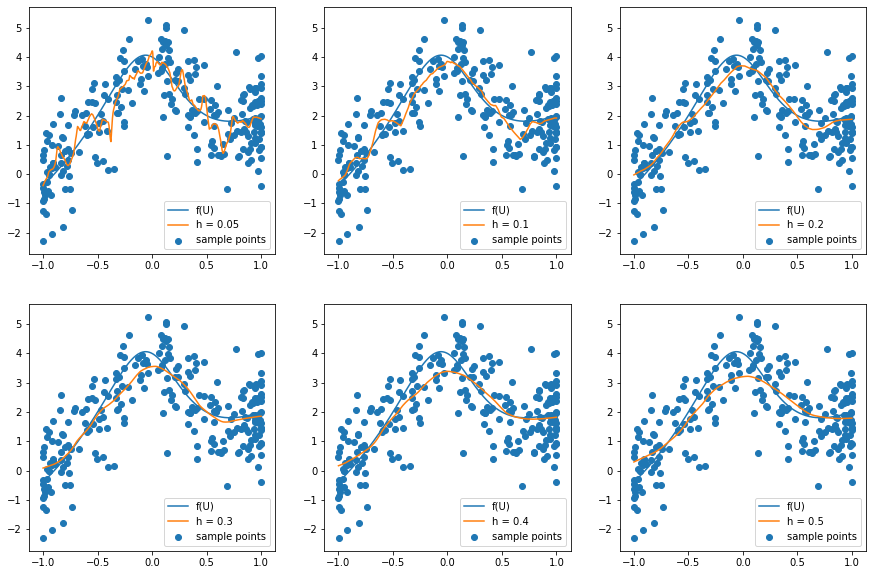

In [1170]:
fig, axs = plt.subplots(2, 3,figsize=(15,10))
h = [0.05,0.1,0.2,0.3,0.4,0.5]
count = 0
for i in range(2):
    for j in range(3):
        axs[i,j].plot(U,f_U,label = 'f(U)')
        axs[i,j].scatter(X_est,f_X_est,label = 'sample points')
        fh_U1 = second_program(X_est,f_X_est,U,h[count])
        ax.plot(U,fh_U1,label='h = {}'.format(h[count]))
        axs[i,j].plot(U,fh_U1,label='h = {}'.format(h[count]))
        axs[i,j].legend()
        count+=1

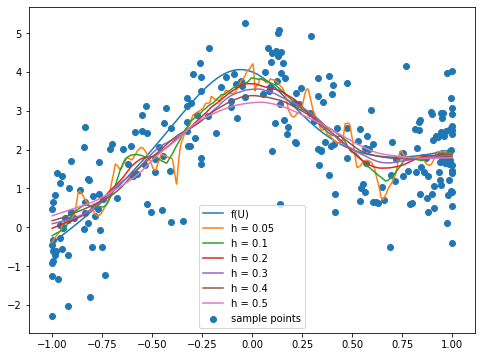

In [1162]:
h = [0.05,0.1,0.2,0.3,0.4,0.5]
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(U,f_U,label = 'f(U)')
ax.scatter(X_est,f_X_est,label = 'sample points')
for hh in h:
    fh_U1 = second_program(X_est,f_X_est,U,hh)
    ax.plot(U,fh_U1,label='h = {}'.format(hh))
ax.legend()

In [1203]:
def second_program_no_iloc(X,Y,x,h):
    fh_u2 = 0
    res_k1 = np.zeros(len(x))
    res_k2 = np.zeros(len(x))
    res = np.zeros(len(x))
    for i in range(len(X)):
        for xx in range(len(x)):
            term = (x[xx]-X[i])/h
            if abs(term) <= 1:
                product = (1-(abs(term))**2)/h 
                res_k1[xx] += Y[i]*((3/4)**1)* product
                res_k2[xx] += ((3/4)**1)* product
    fh_u2 = res_k1/res_k2
    for i in range(len(res_k2)):
        if res_k2[i] == 0:
            fh_u2[i] = 0
    return fh_u2

In [1206]:
#e1 has 250 values
h = [0.05,0.1,0.2,0.3,0.4,0.5]
for hh in h:
    MSE = []
    kf = KFold(10)
    for train_index, test_index in kf.split(f_X_est):
        X_train, X_test = X_est[train_index], X_est[test_index]
        y_train, y_test = f_X_est[train_index], f_X_est[test_index]
        y_hat = second_program_no_iloc(X_train,y_train,X_test,hh)
        MSE.append(sum((y_test-y_hat)**2)/len(y_test))
    print('h = {}, MSE = {}'.format(hh,np.mean(MSE)))

h = 0.05, MSE = 1.0319881071744381
h = 0.1, MSE = 0.9608879563913708
h = 0.2, MSE = 0.9338389867399766
h = 0.3, MSE = 0.936110222018027
h = 0.4, MSE = 0.9547986536833474
h = 0.5, MSE = 0.9915648195777205


In [1204]:
#e2 has 1000 values
h = [0.05,0.1,0.2,0.3,0.4,0.5]
for hh in h:
    MSE = []
    kf = KFold(10)
    for train_index, test_index in kf.split(f_U):
        X_train, X_test = U[train_index], U[test_index]
        y_train, y_test = f_U[train_index], f_U[test_index]
        y_hat = second_program_no_iloc(X_train,y_train,X_test,hh)
        MSE.append(sum((y_test-y_hat)**2)/len(y_test))
    #print(MSE)
    print('h = {}, MSE = {}'.format(hh,np.mean(MSE)))

h = 0.05, MSE = 3.367113823235139
h = 0.1, MSE = 0.3852742266834334
h = 0.2, MSE = 0.10536816231046031
h = 0.3, MSE = 0.11590900843642211
h = 0.4, MSE = 0.17912825636183874
h = 0.5, MSE = 0.290746486939687


In [1208]:
#e3 has 1000 values
h = [0.05,0.1,0.2,0.3,0.4,0.5]
for hh in h:
    MSE = []
    kf = KFold(10)
    for train_index, test_index in kf.split(f_X_test):
        X_train, X_test = X_test1[train_index], X_test1[test_index]
        y_train, y_test = f_X_test[train_index], f_X_test[test_index]
        y_hat = second_program_no_iloc(X_train,y_train,X_test,hh)
        MSE.append(sum((y_test-y_hat)**2)/len(y_test))
    print('h = {}, MSE = {}'.format(hh,np.mean(MSE)))

h = 0.05, MSE = 1.0354250733545445
h = 0.1, MSE = 1.0176219646310667
h = 0.2, MSE = 1.007420728055004
h = 0.3, MSE = 1.014871805041002
h = 0.4, MSE = 1.0358355242842898
h = 0.5, MSE = 1.0756594940083737


# 8. Gaussian Kernel Evaluation: Bandwidth 

In [136]:
import pandas as pd
p3_train = pd.read_csv('project1_F20_2_train.csv')
p3_train = p3_train.drop(columns = ['Unnamed: 0'])
p3_test = pd.read_csv('project1_F20_2_train.csv')
p3_test = p3_test.drop(columns = ['Unnamed: 0'])

In [593]:
estimated_h = np.linspace(0.01, 1, num=100)

In [594]:
def third_program(X,Y,x,h,d):
    fh_u = 0 
    kernel_1=0
    kernel_2=0
    for i in range(len(X)):
        X1 = ((x-X.iloc[i])/h)['X1']
        X2 = ((x-X.iloc[i])/h)['X2']
        res = X1**2 + X2**2
        kernel_1 += Y.iloc[i]* ((np.exp((-(res))/2))/(np.sqrt(2*np.pi))**(d/2))/h**d
        kernel_2 += ((np.exp((-(res))/2))/(np.sqrt(2*np.pi))**(d/2))/h**d
    fh_u += kernel_1/kernel_2
    return fh_u

In [595]:
def cross_val():
    final_mse = []
    for small_h in estimated_h:
        MSE=[]
        kf = KFold(10)
        the_train = p3_train[['X1','X2']]
        the_test = p3_train['Y']
        for train_index, test_index in kf.split(p3_train['X1']):
            X_train, X_test = the_train.iloc[train_index], the_train.iloc[test_index]
            y_train, y_test = the_test.iloc[train_index], the_test.iloc[test_index]
            y_hat = third_program(X_train,y_train,X_test,small_h,2)
            MSE.append(sum((y_test-y_hat)**2)/len(y_test))
        final_mse.append(np.mean(MSE))
    return final_mse

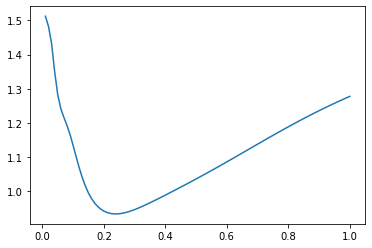

In [596]:
errors = cross_val()
plt.plot(estimated_h, errors)

In [597]:
ind = errors.index(min(errors))
h0 = estimated_h[ind]
h0

0.24000000000000002

In [598]:
the_train_X = p3_train[['X1','X2']]
the_train_Y = p3_train['Y']
the_test_X = p3_test[['X1','X2']]
the_test_Y = p3_test['Y']
test_Y_estimate = third_program(the_train_X,the_train_Y,the_test_X,h0,2)
the_error = sum((the_test_Y-test_Y_estimate)**2)/len(test_Y_estimate)
the_error

0.7256161326108859

# 9. Gaussian Kernel with Binary Classification

In [611]:
p4_train = pd.read_csv('project1_F20_3_train.csv')
p4_train = p4_train.drop(columns = ['Unnamed: 0'])
p4_test = pd.read_csv('project1_F20_3_test.csv')
p4_test = p4_test.drop(columns = ['Unnamed: 0'])
p4_train

,X1,X2,Y
0,-0.053296,-0.014365,1
1,-0.150180,-0.823594,0
2,0.812150,0.117029,1
3,-0.424402,-0.298217,1
4,-0.475149,0.218366,1
...,...,...,...
115,-0.776207,-0.761104,0
116,-0.165806,-0.459679,1
117,-0.277946,0.517612,1
118,0.316233,0.737588,1


In [1003]:
def fourth_program(X,Y,x,h,d):
    out = np.zeros(len(x))
    phi_x_g_0 = 0
    phi_x_g_1 = 0
    X_0 = []
    X_1 = []
       
    for i in range(len(Y)):
        if Y.iloc[i] == 0:
            X_0.append([X.iloc[i][0],X.iloc[i][1]])
        else:
            X_1.append([X.iloc[i][0],X.iloc[i][1]])
    
    df_0 = pd.DataFrame(X_0, columns = ['X1', 'X2'])
    df_1 = pd.DataFrame(X_1, columns = ['X1', 'X2'])

    for i in range(len(df_0)):
        X1_0 = ((x-df_0.iloc[i])/h)['X1']
        X2_0 = ((x-df_0.iloc[i])/h)['X2']   
        res_0 = X1_0*X1_0 + X2_0*X2_0
        phi_x_g_0 += ((np.exp((-(res_0))/2))/(np.sqrt(2*np.pi))**(d/2))/h**d

    for i in range(len(df_1)):
        X1_1 = ((x-df_1.iloc[i])/h)['X1']
        X2_1 = ((x-df_1.iloc[i])/h)['X2']
        res_1 = X1_1*X1_1 + X2_1*X2_1
        phi_x_g_1 += ((np.exp((-(res_1))/2))/(np.sqrt(2*np.pi))**(d/2))/h**d
   
    phi_x_g_0 = phi_x_g_0 /(len(df_0))
    phi_x_g_1 = phi_x_g_1 /(len(df_1))
    
    post_zero = phi_x_g_0/(phi_x_g_1+phi_x_g_0)
    post_one = phi_x_g_1/(phi_x_g_0+phi_x_g_1)
    
   # returned_post = np.zeros(len(x))
    for i in range(len(x)):
        if post_zero.iloc[i]>post_one.iloc[i]:
            out[i] = 0
            #returned_post[i] = post_zero.iloc[i]
        else:
            out[i] = 1
        #    returned_post[i] = post_one.iloc[i]
    ser = pd.Series(out)  
    return ser,post_one

In [937]:
estimated_h = np.linspace(0.01, 1, num=100)
def cross_val():
    final_err = []
    for small_h in estimated_h:
        err=[]
        kf = KFold(10)
        the_train = p4_train[['X1','X2']]
        the_test = p4_train['Y']
        for train_index, test_index in kf.split(p4_train['X1']):
            X_train, X_test = the_train.iloc[train_index], the_train.iloc[test_index]
            y_train, y_test = the_test.iloc[train_index], the_test.iloc[test_index]
            y_hat = fourth_program(X_train,y_train,X_test,small_h,2)[0]
            var = (y_hat == y_test.reset_index(drop=True))
            False_val = var.value_counts().loc[False]
            err.append((False_val)/len(y_test))
        final_err.append(np.mean(err))
    return final_err

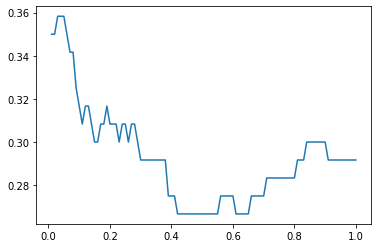

In [938]:
err4 = cross_val()
plt.plot(estimated_h, err4)

In [939]:
ind4 = err4.index(min(err4))
h0_q4 = estimated_h[ind4]
h0_q4

0.42000000000000004

In [991]:
#Trainning error using the optimal h
the_train_X4 = p4_train[['X1','X2']]
the_train_Y4 = p4_train['Y']

test_Y_estimate4 = fourth_program(the_train_X4,the_train_Y4,the_train_X4,h0_q4,2)[0]

var = (test_Y_estimate4 == the_train_Y4.reset_index(drop=True))
False_val = var.value_counts().loc[False]
err41 = ((False_val)/len(test_Y_estimate4))
err41

0.26666666666666666

In [940]:
#Test Error using the optimal h
the_train_X4 = p4_train[['X1','X2']]
the_train_Y4 = p4_train['Y']
the_test_X4 = p4_test[['X1','X2']]
the_test_Y4 = p4_test['Y']
test_Y_estimate4 = fourth_program(the_train_X4,the_train_Y4,the_test_X4,h0_q4,2)[0]

var = (test_Y_estimate4 == the_test_Y4.reset_index(drop=True))
False_val = var.value_counts().loc[False]
err41 = ((False_val)/len(test_Y_estimate4))
err41

0.312

Rerun the previous experiment after slightly modify the cross-validation part by replacing the error term used to evaluate, on a training subset T2, the performance of a classifier trained on a training subset T1 by the negative log-likelihood:

In [1001]:
#T2 is test set
#T1 is training set
estimated_h = np.linspace(0.01, 1, num=100)
def cross_val4():
    final_err = []
    for small_h in estimated_h:
        err=[]
        kf = KFold(10)
        the_train = p4_train[['X1','X2']]
        the_test = p4_train['Y']
        for train_index, test_index in kf.split(p4_train['X1']):
            X_train, X_test = the_train.iloc[train_index], the_train.iloc[test_index]
            y_train, y_test = the_test.iloc[train_index], the_test.iloc[test_index]
            probs = fourth_program(X_train,y_train,X_test,small_h,2)[1]
            err.append(-np.ma.masked_invalid(np.log(probs)).sum()/len(y_test))
   
        final_err.append(np.mean(err))
    return final_err

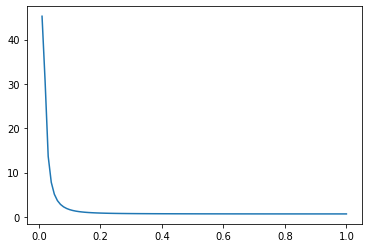

In [999]:
err5 = cross_val4()
plt.plot(estimated_h, err5)

In [989]:
ind41 = err5.index(min(err5))
h0_q41 = estimated_h[ind41]
h0_q41

1.0

In [1007]:
#Training error using the optimal h
the_train_X4 = p4_train[['X1','X2']]
the_train_Y4 = p4_train['Y']
test_Y_estimate4 = fourth_program(the_train_X4,the_train_Y4,the_train_X4,h0_q41,2)[0]

var = (test_Y_estimate4 == the_train_Y4.reset_index(drop=True))
False_val = var.value_counts().loc[False]
err412 = ((False_val)/len(test_Y_estimate4))
err412

0.26666666666666666

In [1005]:
#Test error using the optimal h
the_train_X4 = p4_train[['X1','X2']]
the_train_Y4 = p4_train['Y']
the_test_X4 = p4_test[['X1','X2']]
the_test_Y4 = p4_test['Y']
test_Y_estimate4 = fourth_program(the_train_X4,the_train_Y4,the_test_X4,h0_q41,2)[0]

var = (test_Y_estimate4 == the_test_Y4.reset_index(drop=True))
False_val = var.value_counts().loc[False]
err411 = ((False_val)/len(test_Y_estimate4))
err411

0.324